In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential,Model

In [ ]:
 from tensorflow.keras.datasets import cifar10

In [ ]:
(train_x,train_y),(test_x,test_y)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [28]:
train_x=train_x/255
test_x=test_x/255

In [29]:
train_x_1=train_x.reshape(train_x.shape[0],-1)
test_x_1=test_x.reshape(test_x.shape[0],-1)


In [103]:
class netA(Model):
  def __init__(self):
    super(netA,self).__init__()
    self.dense_1=Dense(10,activation='softmax')

  def call(self,inputs):
    x=self.dense_1(inputs)
    return x

In [120]:
class netB(Model):
  def __init__(self):
    super(netB,self).__init__()
    self.dense_1=Dense(10,activation='softmax',input_shape=(3072,))
    self.dense_2=Dense(300,activation='relu')

  def call(self,inputs):
    x=self.dense_2(inputs)
    x=self.dense_1(x)
    return x

In [98]:
class netC(Model):
  def __init__(self):
    super(netC,self).__init__()
    self.dense_1=Dense(10,activation='softmax')
    
    self.conv2D=Conv2D(25,5,activation='relu',input_shape=(32,32,3))
    self.max=MaxPooling2D(2,2)
    self.flat=Flatten()

  def call(self,inputs):
    x=self.conv2D(inputs)
    x=self.max(x)
    x=self.flat(x)
    x=self.dense_1(x)
    return x

In [ ]:
label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] 

In [142]:
def plotloss(history):
    plt.figure(figsize=(10,10))
    plt.plot(history.history['acc'],label='acc')
    plt.plot(history.history['val_acc'],label='val_acc')
    
    plt.title('model acc')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    


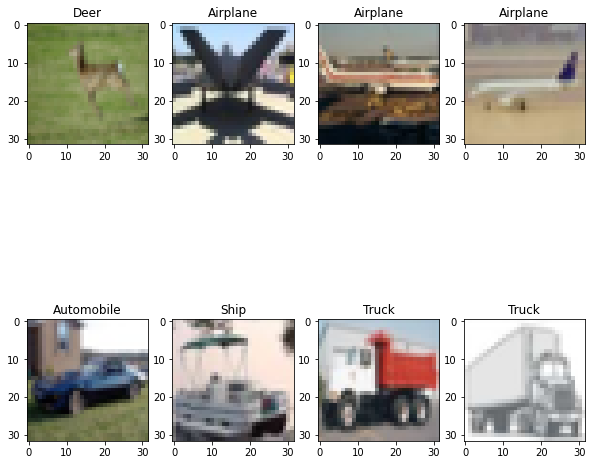

In [25]:
fig,ax=plt.subplots(2,4,figsize=(10,10))

for i in range(2):
  for j in range(4):
    a=np.random.choice(train_x.shape[0],1)
    ax[i,j].imshow(np.squeeze(train_x[a]))
    ax[i,j].set_title(label[train_y[a][0][0]])

In [125]:
net1=netA()
net1.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history1=net1.fit(train_x_1,train_y,epochs=50,validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9719 - acc: 0.3116 - val_loss: 1.9391 - val_acc: 0.3352
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8922 - acc: 0.3469 - val_loss: 1.8699 - val_acc: 0.3551
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8601 - acc: 0.3618 - val_loss: 1.8972 - val_acc: 0.3365
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8335 - acc: 0.3727 - val_loss: 1.8787 - val_acc: 0.3715
Epoch 5/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8272 - acc: 0.3762 - val_loss: 1.9108 - val_acc: 0.3504
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8208 - acc: 0.3766 - val_loss: 1.8690 - val_acc: 0.3639
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8178 - acc: 0.3805 - val_loss: 2.0542 - val_acc: 0.3373
Epoch 8/50
1250/1250 [==============================] - 3s 3ms

In [127]:
net2=netB()
net2.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history2=net2.fit(train_x_1,train_y,epochs=50,validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9130 - acc: 0.3169 - val_loss: 1.8063 - val_acc: 0.3519
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7349 - acc: 0.3790 - val_loss: 1.7161 - val_acc: 0.3949
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6721 - acc: 0.4026 - val_loss: 1.7180 - val_acc: 0.3876
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6339 - acc: 0.4196 - val_loss: 1.6515 - val_acc: 0.4080
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6052 - acc: 0.4295 - val_loss: 1.6441 - val_acc: 0.4149
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5787 - acc: 0.4430 - val_loss: 1.6112 - val_acc: 0.4293
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5497 - acc: 0.4480 - val_loss: 1.5901 - val_acc: 0.4423
Epoch 8/50
1250/1250 [==============================] - 4s 3ms

In [129]:
net3=netC()
net3.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history3=net3.fit(train_x,train_y,epochs=50,validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5499 - acc: 0.4518 - val_loss: 1.3661 - val_acc: 0.5232
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2951 - acc: 0.5476 - val_loss: 1.2787 - val_acc: 0.5570
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1800 - acc: 0.5893 - val_loss: 1.2447 - val_acc: 0.5696
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0924 - acc: 0.6218 - val_loss: 1.1733 - val_acc: 0.5966
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0296 - acc: 0.6447 - val_loss: 1.1622 - val_acc: 0.6049
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9860 - acc: 0.6600 - val_loss: 1.1099 - val_acc: 0.6192
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9444 - acc: 0.6749 - val_loss: 1.1301 - val_acc: 0.6155
Epoch 8/50
1250/1250 [==============================] - 5s 4ms

313/313 [==============================] - 1s 2ms/step - loss: 1.8874 - acc: 0.3685


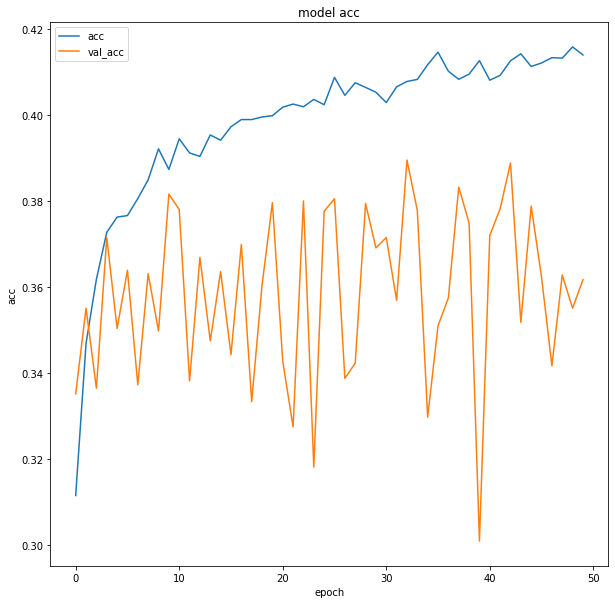

In [153]:
net1.evaluate(test_x_1,test_y)
plotloss(history1)


313/313 [==============================] - 1s 3ms/step - loss: 1.5288 - acc: 0.4676


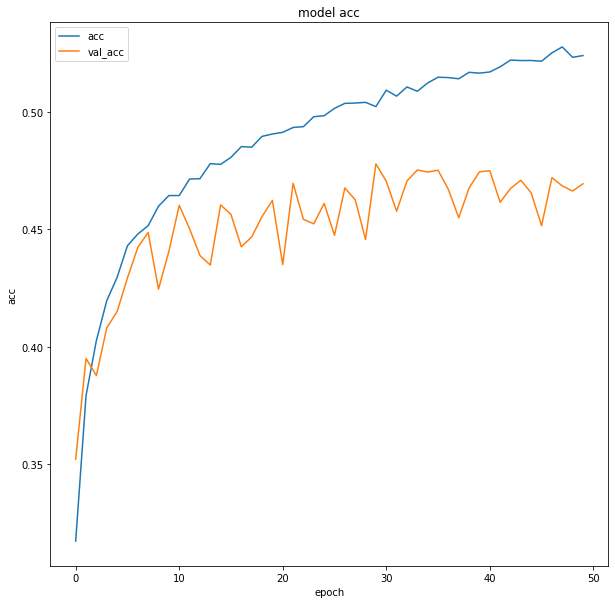

In [154]:
net2.evaluate(test_x_1,test_y)
plotloss(history2)

313/313 [==============================] - 1s 3ms/step - loss: 1.7529 - acc: 0.5903


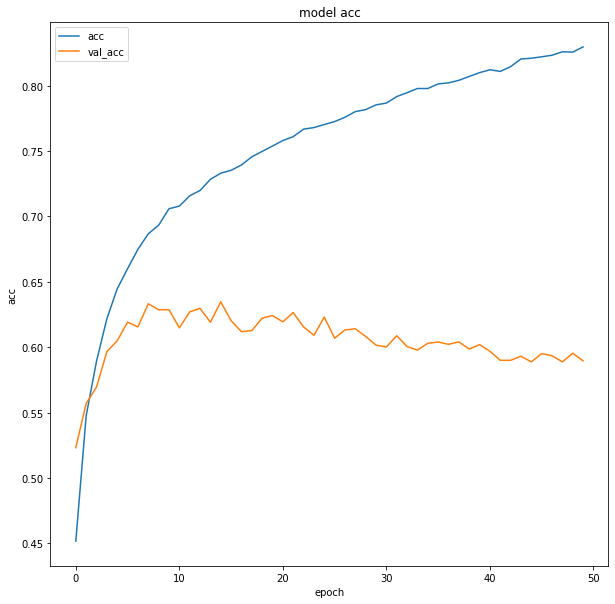

In [158]:
net3.evaluate(test_x,test_y)
plotloss(history3)

**USing seqeuntial api Model 1 ====>No hidden layer**

In [60]:
NetA=Sequential([
                    Dense(10,input_shape=(3072,),activation='softmax')
])

In [61]:
NetA.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [102]:

NetB=Sequential([
                    
                    Dense(300,activation='relu',input_shape=(3072,)),
                    Dense(10,activation='softmax')
                    


                    
])

In [64]:
NetB.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [70]:
NetC=Sequential([
                    
                    Conv2D(25,5,activation='relu',input_shape=(32,32,3)),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(10,activation='softmax'),
                    
])